In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad

## 1

### a

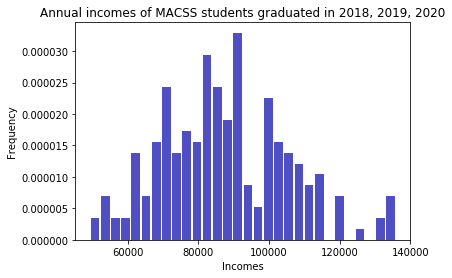

In [2]:
Incomes = np.loadtxt('incomes.txt')
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### b

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


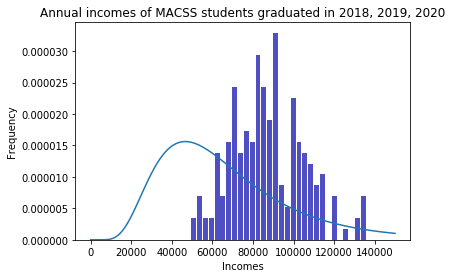

The value of the log likelihood value is -2379.120591931827


In [3]:
def lognorm(x, mu=11, sigma=0.5):
    return 1/(x*sigma * np.sqrt(2 * np.pi))*np.e**(-(np.log(x) - mu)**2 / (2 * sigma**2))
def log_lik_truncnorm(x, mu=11, sigma=0.5, cut_lb=0, cut_ub=150000):
    pdf_vals = lognorm(x, mu, sigma)
    if cut_lb!=None and cut_ub!=None:
        total = quad(lambda x: lognorm(x, mu,sigma), cut_lb, cut_ub)[0]
    elif cut_lb!=None and cut_ub==None:
        total = 1-quad(lambda x: lognorm(x, mu,sigma), cut_lb, np.inf)[0]
    elif cut_lb==None and cut_ub!=None:
        total = quad(lambda x: lognorm(x, mu,sigma), -np.inf, cut_ub)[0]
    else:
        total = 1
    polishedpdf = pdf_vals/total
    ln_pdf_vals = np.log(polishedpdf)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
total = quad(lognorm, 0, 150000)[0]
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(X, lognorm(X)/total)
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()
LLV = log_lik_truncnorm(Incomes)
print('The value of the log likelihood value is', LLV)

### c

In [4]:
def crit(params, *args):
    mu, sigma = params
    x, cut_lb, cut_ub = args
    log_lik_val = log_lik_truncnorm(x, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val    
    return neg_log_lik_val

In [5]:
import scipy.optimize as opt
mu_init = 11
sig_init = 0.5 
params_init = np.array([mu_init, sig_init])
mle_args = (Incomes, 0, 150000)
results = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results.x
LLV_MLE = log_lik_truncnorm(Incomes, mu_MLE, sig_MLE)
VCV_MLE = results.hess_inv
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('The value of the log likelihood value is', LLV_MLE)
print('The variance-covariance matrix is', VCV_MLE)

mu_MLE= 11.361699971261004  sig_MLE= 0.2117432623314924
The value of the log likelihood value is -2240.9343375116364
The variance-covariance matrix is [[8.67691939e-05 3.92325340e-05]
 [3.92325340e-05 1.16938120e-04]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


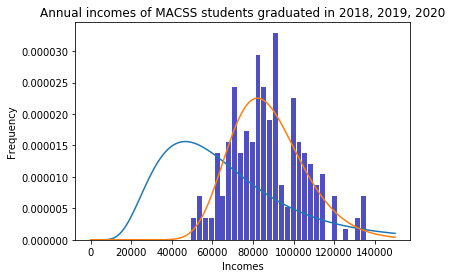

In [6]:
total1 = quad(lognorm, 0, 150000)[0]
total2 = quad(lambda x: lognorm(x, mu=mu_MLE,sigma=sig_MLE), 0, 150000)[0]
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(X, lognorm(X)/total1, label = 'initial guess')
ax.plot(X, lognorm(X, mu=mu_MLE,sigma=sig_MLE)/total2, label = 'MLE result')
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### d

In [7]:
mu_new, sig_new = np.array([11, 0.5])
log_lik_h0 = log_lik_truncnorm(Incomes, mu_new, sig_new, 0, 150000)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_truncnorm(Incomes, mu_MLE, sig_MLE, 0, 150000)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.9343375116364
likelihood ratio value 276.37250884038167
chi squared of H0 with 2 degrees of freedom p-value =  0.0


### e

In [8]:
print("The probability that you will earn more than $100,000 is",
      quad(lambda x: lognorm(x, mu=mu_MLE,sigma=sig_MLE), 100000, 150000)[0]/total2)
print("The probability that you will earn less than $75,000 is",
      quad(lambda x: lognorm(x, mu=mu_MLE,sigma=sig_MLE), 0, 75000)[0]/total2)

The probability that you will earn more than $100,000 is 0.23427612236731754
The probability that you will earn less than $75,000 is 0.26076018268903833


## 2

### a

beta0_MLE = 0.2516415006612955 beta1_MLE = 0.012928701541639099 beta2_MLE = 0.40049960366812937 beta3_MLE = -0.009997925330571518 sigma_MLE = 0.0027268719115135
The value of the log likelihood value is 871.487646107643
The variance-covariance matrix is [[ 9.99749814e-01 -1.07472308e-02 -4.38873773e-04 -1.15948335e-02
  -1.55722702e-04]
 [-1.07472308e-02  5.38385787e-01 -1.88499775e-02 -4.98050664e-01
   1.13266069e-02]
 [-4.38873773e-04 -1.88499775e-02  9.99230140e-01 -2.03364503e-02
   1.57898527e-03]
 [-1.15948335e-02 -4.98050664e-01 -2.03364503e-02  4.62631712e-01
  -1.05543181e-02]
 [-1.55722702e-04  1.13266069e-02  1.57898527e-03 -1.05543181e-02
   2.42229668e-04]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


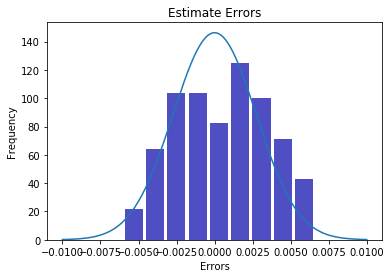

In [9]:
def norm_pdf(x, sigma):
    sigma = np.abs(sigma)
    pdf_vals = (1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - x**2 / (2 * sigma**2)))     
    return pdf_vals
def log_lik_norm(x, beta0, beta1, beta2, beta3, sigma):
    error = x[:,0] - beta0 - beta1*x[:,1] - beta2*x[:,2] - beta3*x[:,3]
    pdf_vals = norm_pdf(error, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
def new_crit(params, *args):
    beta0, beta1, beta2, beta3, sigma = params
    x = args[0]
    log_lik_val = log_lik_norm(x,beta0, beta1, beta2, beta3, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val
Data = []
with open('sick.txt') as f:
    for line in f:
        line = line.strip()
        data = line.split(',')
        Data.append(data)
Data.pop(0)
for i in range(len(Data)):
    Data[i] = [float(x) for x in Data[i]]
Data = np.array(Data)
new_Data = np.ones_like(Data)
new_Data[:,1:] = Data[:,1:]
beta0_init, beta1_init, beta2_init, beta3_init = np.linalg.lstsq(new_Data,Data[:,0])[0]
sigma_init = 0.01 
parameters_init = np.array([beta0_init, beta1_init, beta2_init, beta3_init, sigma_init])
results2 = opt.minimize(new_crit, parameters_init, args=(Data))
beta0_MLE, beta1_MLE, beta2_MLE, beta3_MLE, sigma_MLE = results2.x
new_LLV_MLE = log_lik_norm(Data, beta0_MLE, beta1_MLE, beta2_MLE, beta3_MLE, sigma_MLE)
new_VCV_MLE = results2.hess_inv
print('beta0_MLE =',beta0_MLE,
      'beta1_MLE =',beta1_MLE,
      'beta2_MLE =',beta2_MLE, 
      'beta3_MLE =',beta3_MLE,
      'sigma_MLE =',sigma_MLE)
print('The value of the log likelihood value is', new_LLV_MLE)
print('The variance-covariance matrix is', new_VCV_MLE)
Error = Data[:,0] - beta0_MLE - beta1_MLE*Data[:,1] - beta2_MLE*Data[:,2] - beta3_MLE*Data[:,3]
X2 = np.linspace(-0.01,0.01,10001)
fig,ax = plt.subplots()
ax.set_xlabel('Errors')
ax.set_ylabel('Frequency')
ax.set_title('Estimate Errors')
ax.plot(X2, norm_pdf(X2,sigma_MLE))
ax.hist(x=Error, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### b

In [12]:
parameters_new = np.array([1,0,0,0,0.01])
log_lik_h0 = log_lik_norm(Data, *parameters_new)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_norm(Data, *results2.x)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -inf
MLE log likelihood 871.487646107643
likelihood ratio value inf
chi squared of H0 with 5 degrees of freedom p-value =  0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


The results show that it's not likely that age, number of children, and average winter temperature have no effect on the number of sick days.